In [1]:
import time
from snowflake.snowpark.session import Session
import configparser
 
import warnings
warnings.filterwarnings("ignore")
 
config = configparser.ConfigParser()
config.read("snowflake_connection.ini")
 
connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    "account": f'{config["Snowflake"]["account"]}',
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}
 
def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session
 
session = snowflake_connector(connection_parameters)

connection successful!


In [3]:
import pandas as pd
import numpy as np
import sklearn

#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ModuleNotFoundError: No module named 'sklearn'

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# train dataset
df = pd.read_csv("3.FMCG_data_location_changed.csv")

# test dataset
df_test = pd.read_csv("3.FMCG_data_location_changed.csv")

In [4]:
df

,Date,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,01-01-2023,WH_100000,EID_50000,rural,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,2,0.0,A,5.0,15.0,17115.0
1,01-01-2023,WH_100001,EID_50001,urban,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,14,0.0,A,3.0,17.0,5074.0
2,01-01-2023,WH_100002,EID_50002,urban,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,15,0.0,A,6.0,22.0,23137.0
3,01-01-2023,WH_100003,EID_50003,urban,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,10,1.0,A+,3.0,27.0,22115.0
4,01-01-2023,WH_100004,EID_50004,urban,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,5,0.0,C,6.0,24.0,24071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349996,01-02-2024,WH_124996,EID_74996,rural,Mid,West,Zone 2,4,7,1,...,1,130,39.0,2005.0,16,0.0,B,21.0,36.0,37853.0
349997,01-02-2024,WH_124997,EID_74997,rural,Large,South,Zone 5,12,4,0,...,1,147,27.0,2012.0,18,1.0,A,30.0,55.0,65888.0
349998,01-02-2024,WH_124998,EID_74998,urban,Small,North,Zone 1,1,4,10,...,1,60,44.0,NaN,18,0.0,B,17.0,38.0,38534.0
349999,01-02-2024,WH_124999,EID_74999,urban,Mid,West,Zone 4,3,3,4,...,1,239,57.0,NaN,1,0.0,B+,16.0,41.0,58351.0


In [5]:
df.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
storage_issue_reported             20
Date                               14
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [6]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID','Date'], inplace = True)
df['workers_num'].median()
df['approved_wh_govt_certificate'].mode()
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)
df.isnull().sum()
df.nunique().sort_values(ascending= True)

Location_type                       2
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        6
storage_issue_reported             20
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_est_year                        28
wh_breakdown                       47
govt_check                         70
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [7]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
rural    175005
urban    174996
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [8]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [9]:
outlier_counts = count_outliers(df)
outlier_counts

{'Refill_Requests': 4159,
 'transport_issue': 3852,
 'No_of_Competitor': 16980,
 'No_of_retailers': 7980,
 'Number_of_distributors': 494,
 'flood_impacted': 34356,
 'flood_proof': 19125,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8332,
 'wh_est_year': 0,
 'storage_issue_reported': 0,
 'temp_reg_mach': 0,
 'wh_breakdown': 436,
 'govt_check': 114,
 'product_wg_ton': 1327}

In [10]:
df['product_wg_ton'].corr(df['flood_proof'])
df['product_wg_ton'].corr(df['flood_impacted'])
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [11]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [12]:
df = remove_outliers(df)
df.shape

(161468, 20)

In [13]:
df_test.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
storage_issue_reported             20
Date                               14
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [14]:
df_test.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)
print(len(df_test[df_test.duplicated]))

0


In [15]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.28 % missing values
wh_est_year 47.52 % missing values
approved_wh_govt_certificate 3.63 % missing values


In [16]:
df_test.drop(columns=['wh_est_year'], inplace = True)
df_test['workers_num'].median()
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)
df_test['approved_wh_govt_certificate'].mode()
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)
df_test.isnull().sum()
df_test.nunique().sort_values(ascending= True)

temp_reg_mach                       2
Location_type                       2
electric_supply                     2
flood_proof                         2
flood_impacted                      2
Warehouse_Ownership                 2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        6
Date                               14
storage_issue_reported             20
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_breakdown                       47
govt_check                         70
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [17]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
rural    175005
urban    174996
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [18]:
df_test['product_wg_ton'].corr(df_test['storage_issue_reported'])

0.00010556762370374955

In [19]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [20]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [21]:
df_test = remove_outliers(df_test)

In [22]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']

In [23]:
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

In [24]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  54279
No_of_retailers                  6267
dist_from_hub                     217
Number_of_distributors            115
govt_check                         63
workers_num                        60
wh_breakdown                       38
wh_est_year                        28
storage_issue_reported             20
Refill_Requests                    15
transport_issue                    11
No_of_Competitor                   10
approved_wh_govt_certificate        6
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [25]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [26]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [27]:
df['Location_type'] = df['Location_type'].replace([0,1])
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
4,1,0,1,4,3,1,2,4740,0,42,1,112,25.0,2009.0,5,0.0,5,6.0,24.0,24071.0
5,1,2,3,0,8,0,2,5053,1,37,1,152,35.0,2009.0,4,1.0,2,3.0,3.0,32134.0
6,1,0,3,5,8,0,4,4449,0,38,1,77,27.0,2010.0,16,0.0,3,3.0,6.0,30142.0
8,1,2,2,5,8,1,4,5381,1,42,1,124,22.0,2013.0,15,1.0,2,5.0,2.0,18082.0
10,1,0,1,5,7,1,3,4623,0,31,1,150,37.0,1999.0,18,0.0,4,4.0,6.0,21125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,1,1,1,3,2,3,5,5160,1,85,0,71,46.0,2000.0,13,0.0,1,26.0,35.0,45654.0
349995,1,2,1,0,11,0,7,6256,1,68,1,142,62.0,2016.0,14,0.0,4,28.0,38.0,52057.0
349996,1,1,3,1,4,7,1,5332,0,85,1,130,39.0,2005.0,16,0.0,3,21.0,36.0,37853.0
349997,1,0,2,4,12,4,0,4044,1,65,1,147,27.0,2012.0,18,1.0,1,30.0,55.0,65888.0


In [28]:

X_train = df.drop(['product_wg_ton','wh_est_year', 'WH_regional_zone'], axis=1)
Y_train = df['product_wg_ton']
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)
X_test.head()

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check
0,0,2,3,3,1,2,6000,1,24,1,91,29.0,2,0.0,1,5.0,15.0
1,1,0,1,0,0,4,6217,0,47,1,210,31.0,14,0.0,1,3.0,17.0
2,1,1,2,1,0,4,4306,0,64,0,161,37.0,15,0.0,1,6.0,22.0
3,1,1,1,7,4,2,6000,1,50,0,103,21.0,10,1.0,2,3.0,27.0
4,1,0,1,3,1,2,4740,0,42,1,112,25.0,5,0.0,5,6.0,24.0


In [29]:
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)
X_test.head()

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check
0,0,2,3,3,1,2,6000,1,24,1,91,29.0,2,0.0,1,5.0,15.0
1,1,0,1,0,0,4,6217,0,47,1,210,31.0,14,0.0,1,3.0,17.0
2,1,1,2,1,0,4,4306,0,64,0,161,37.0,15,0.0,1,6.0,22.0
3,1,1,1,7,4,2,6000,1,50,0,103,21.0,10,1.0,2,3.0,27.0
4,1,0,1,3,1,2,4740,0,42,1,112,25.0,5,0.0,5,6.0,24.0


In [30]:
#Linear Regression
LRmodel = LinearRegression()

In [31]:
LRmodel.fit(X_train, Y_train)

LinearRegression()

In [32]:
LR_y_predicted = LRmodel.predict(X_test)
LR_y_predicted


array([28636.71848473, 28157.81882814, 32709.99724298, ...,
       53225.62945706, 38525.92269346, 56275.77754594])

In [ ]:
predictions_location = pd.DataFrame(LR_y_predicted, columns =['product_wg_ton_pred2']) 
predictions_location

In [ ]:
predictions_location.to_csv('FMCG_data_original_predictions.csv', index=False)

In [33]:
Y_test = df_test['product_wg_ton']
Y_test.head()

0    17115.0
1     5074.0
2    23137.0
3    22115.0
4    24071.0
Name: product_wg_ton, dtype: float64

In [34]:
# r2 score
lr_r2 = r2_score(Y_test, LR_y_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_y_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_y_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)

R2 score:   0.274
Root Mean Squared Error:   12442.117
Mean Absolute Error:   10161.415


In [35]:
DTmodel = DecisionTreeRegressor(random_state = 0)

In [36]:

DTmodel.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [37]:
DT_predicted = DTmodel.predict(X_test)

In [38]:
DT_predicted

array([17138., 26020., 39877., ..., 65888., 53156., 50619.])

In [39]:
# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)

R2 score:   0.327
Root Mean Squared Error:   11975.467
Mean Absolute Error:   6511.044


In [40]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 
RFmodel.fit(X_train, Y_train)
RF_predicted = RFmodel.predict(X_test)
RF_predicted

array([31113.57450472, 28047.4443609 , 31113.57450472, ...,
       49012.50482238, 37649.53646794, 48960.84627929])

In [41]:
# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)

R2 score:   0.271
Root Mean Squared Error:   12464.696
Mean Absolute Error:   10162.734


In [42]:

GBmodel = GradientBoostingRegressor()
GBmodel.fit(X_train,Y_train)
GB_predicted = GBmodel.predict(X_test)
GB_predicted

array([28673.36481543, 28606.79717157, 30859.29119071, ...,
       49690.4779346 , 40078.53234515, 49333.17970743])

In [43]:
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

R2 score:   0.298
Root Mean Squared Error:   12228.312
Mean Absolute Error:   9978.308


Text(0, 0.5, 'Predicted Values')

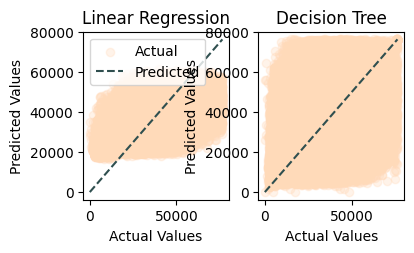

In [44]:
ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_y_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

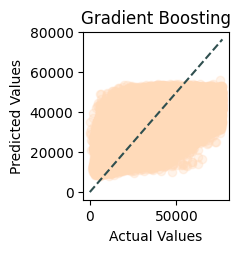

In [45]:
ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()